Recommended products for User 1: [101, 102, 103, 104, 105]


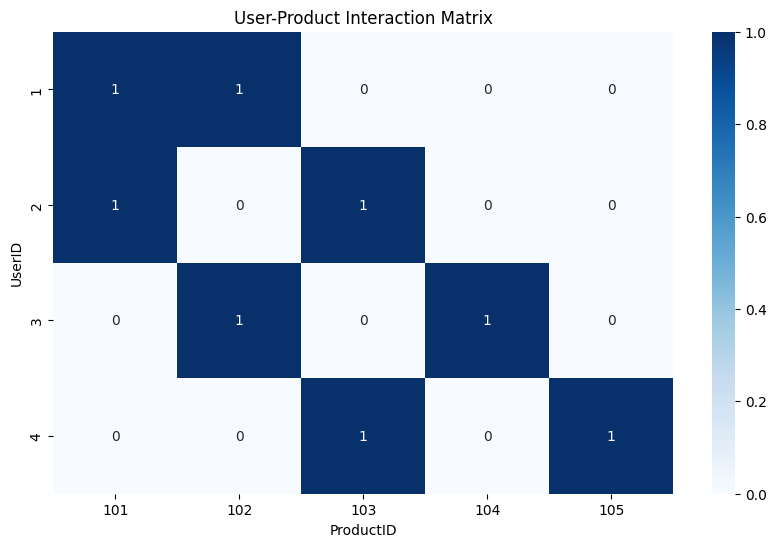

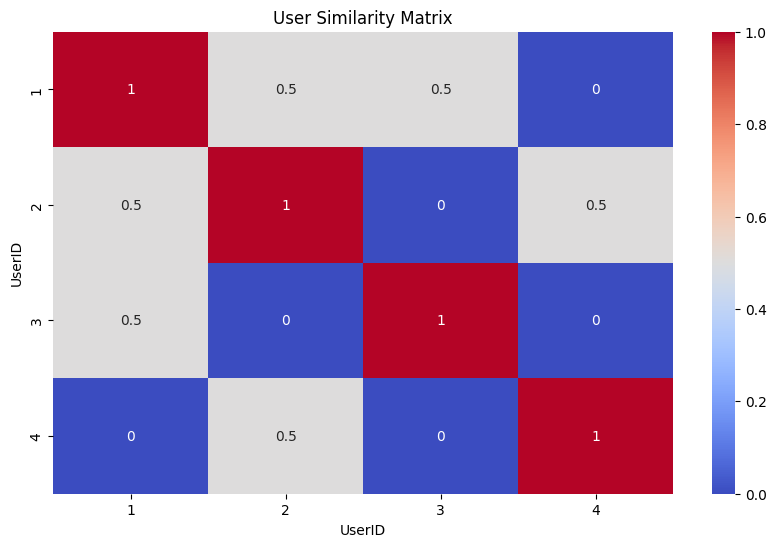

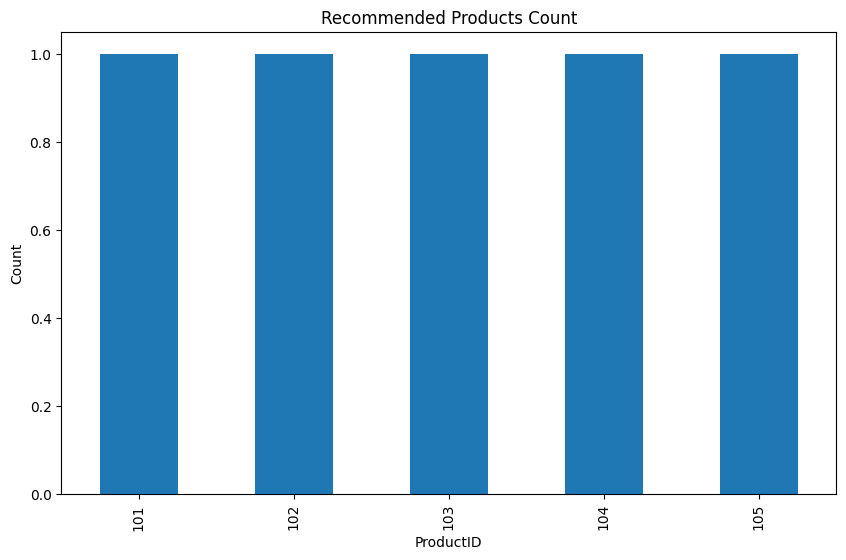

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


data = {
    'UserID': [1, 1, 2, 2, 3, 3, 4, 4],
    'ProductID': [101, 102, 101, 103, 102, 104, 103, 105],
    'Interaction': [1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)


user_product_matrix = df.pivot(index='UserID', columns='ProductID', values='Interaction').fillna(0)


similarity_matrix = cosine_similarity(user_product_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=user_product_matrix.index, columns=user_product_matrix.index)


def recommend_products(user_id, user_product_matrix, similarity_df):
    similar_users = similarity_df[user_id].sort_values(ascending=False).index[1:]
    recommendations = []
    for similar_user in similar_users:
        products = user_product_matrix.loc[similar_user]
        recommendations.extend(products.index[products > 0].tolist())

    recommended_products = list(set(recommendations))
    return recommended_products


user_id = 1
recommended_products = recommend_products(user_id, user_product_matrix, similarity_df)
print(f"Recommended products for User {user_id}: {recommended_products}")


plt.figure(figsize=(10, 6))
sns.heatmap(user_product_matrix, annot=True, cmap='Blues', cbar=True)
plt.title('User-Product Interaction Matrix')
plt.xlabel('ProductID')
plt.ylabel('UserID')
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', cbar=True)
plt.title('User Similarity Matrix')
plt.xlabel('UserID')
plt.ylabel('UserID')
plt.show()


recommended_product_counts = pd.Series(recommended_products).value_counts()
plt.figure(figsize=(10, 6))
recommended_product_counts.plot(kind='bar')
plt.title('Recommended Products Count')
plt.xlabel('ProductID')
plt.ylabel('Count')
plt.show()

#CART (Classification and Regression Trees) is a decision tree algorithm used for both classification and regression tasks in machine learning.
 #CART creates a binary decision tree by recursively splitting the dataset into subsets based on feature values to predict a target variable.
 #Classification Trees:
#Used for: Classifying data into categories or classes (e.g., "spam" or "not spam").
#Output: A class label.
#Splitting Criterion: Gini impurity or entropy is used to measure the quality of a split.
#Example: Predicting whether a person will buy a product (yes/no).
#Regression Trees:
#Used for: Predicting continuous numeric outcomes (e.g., house prices, temperature).
#Output: A numeric value.
#Splitting Criterion: Mean Squared Error (MSE) or variance reduction is used to decide the best split.
#Example: Predicting the price of a house based on features like size and location.
#Applications of CART
#Classification: Medical diagnosis (e.g., classifying patients based on symptoms), credit scoring, spam filtering.
#Regression: Predicting house prices, stock prices, or any continuous output.
#Parameters:
#Cosine Similarity: This metric measures the similarity between two users by comparing the cosine of the angle between their interaction vectors.

#n_neighbors: Although not explicitly used here, the number of neighbors (similar users) could be limited to a certain value to improve recommendations.
# In this example, recommendations are gathered from all similar users.
